In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

## Problem 1

In [6]:
titles = ['iris', 'poisons', 'diamonds']
datasets = {i:data(i) for i in titles}

In [7]:
[print(i, '\n', datasets[i].info()) for i in titles]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
iris 
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 48
Data columns (total 3 columns):
time      48 non-null float64
poison    48 non-null int64
treat     48 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
poisons 
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y     

[None, None, None]

### Iris dataset from pydataset

In [8]:
datasets['iris'].Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 1
From the plot below we can conclude that setosa is the easiest to classify since it has almost no overlap with versicolor and verginica given tis petal length and petal width

<IPython.core.display.Javascript object>


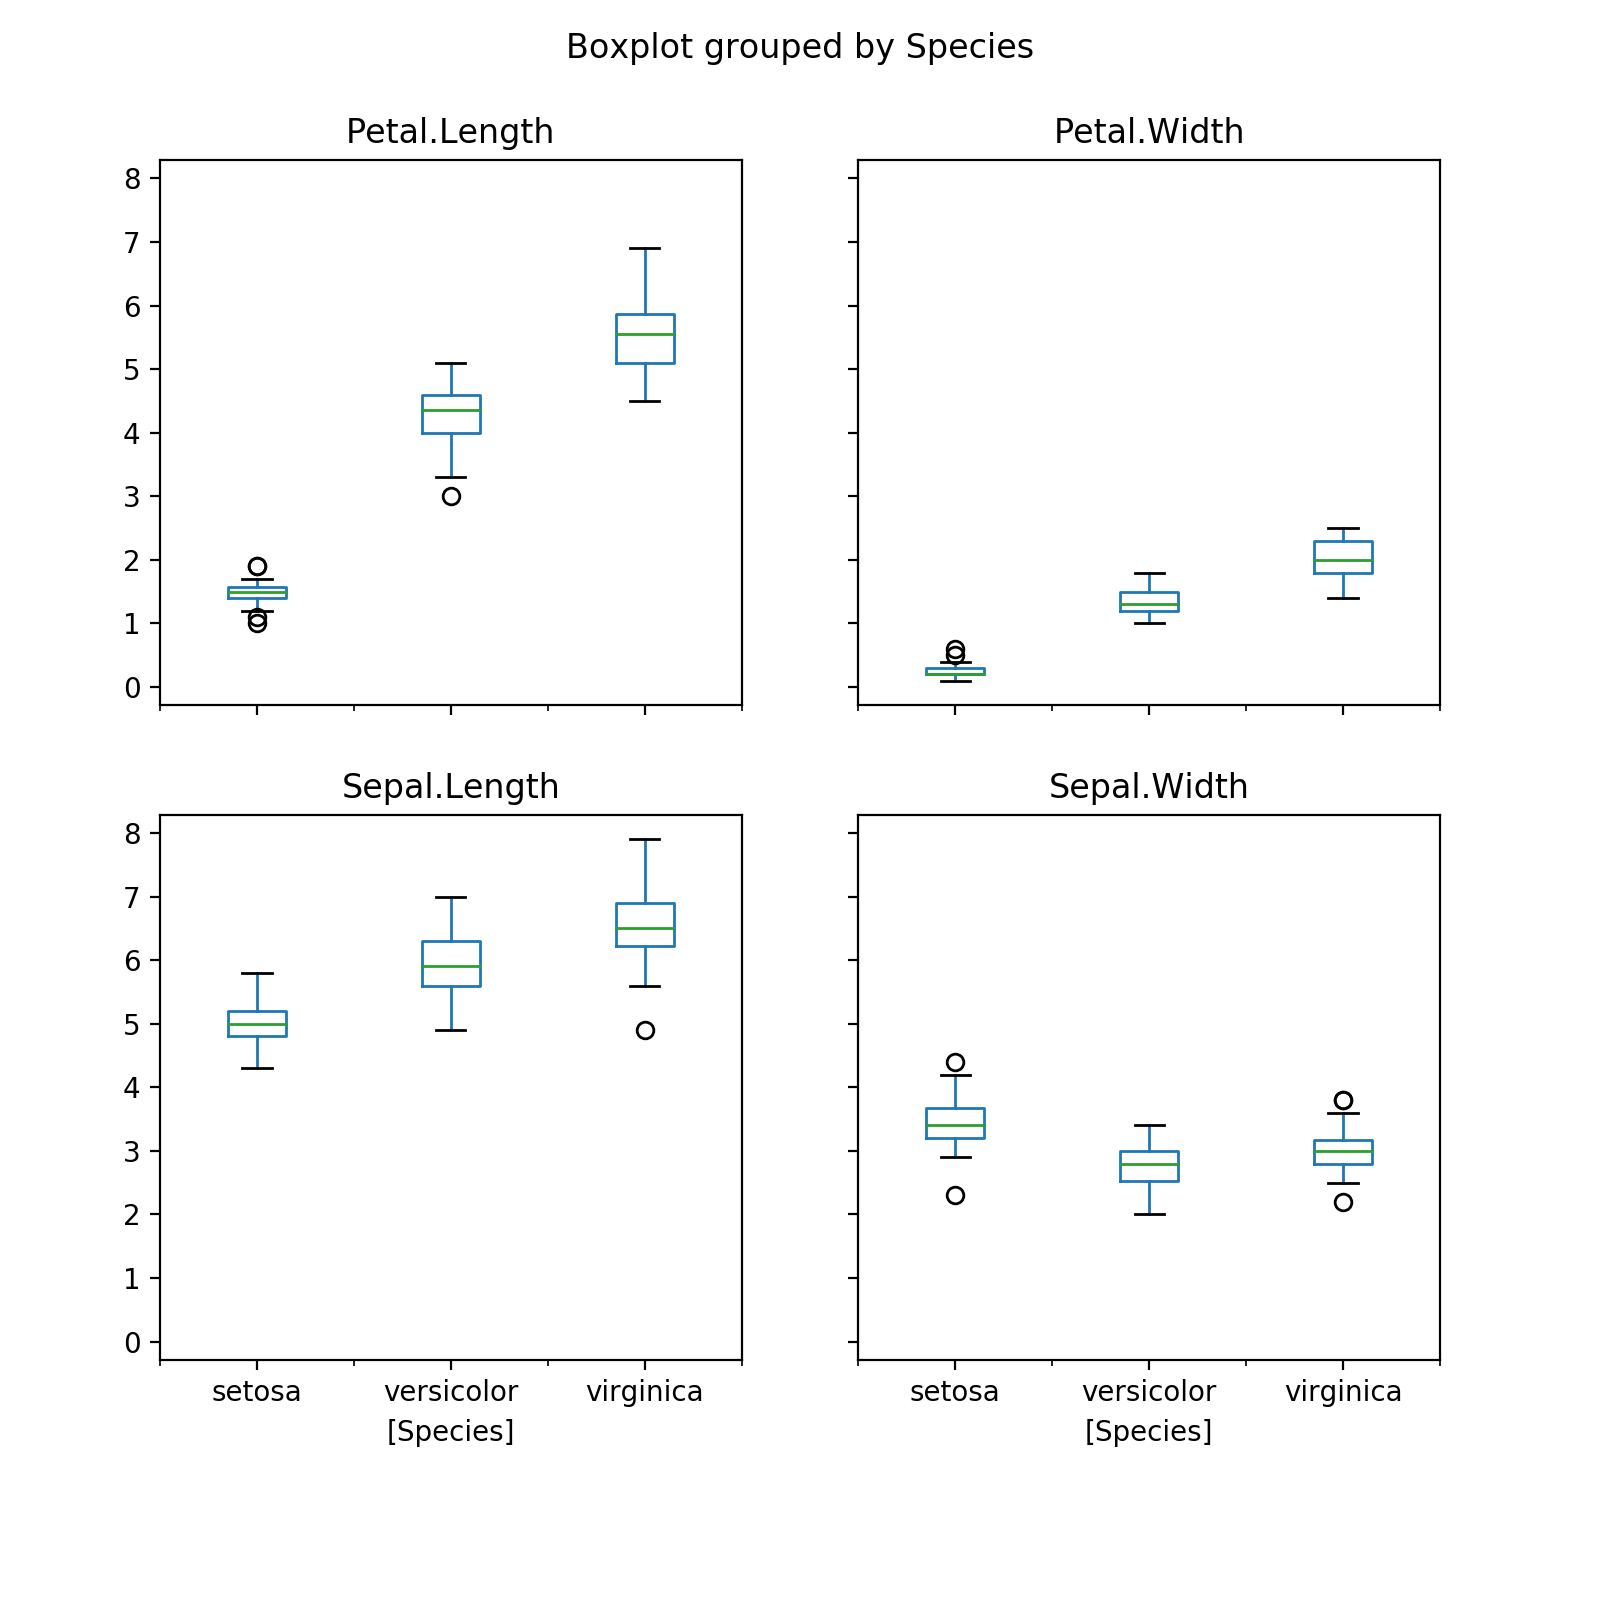

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11908d9e8>,
      dtype=object)

In [10]:
datasets['iris'].boxplot(rot=0, grid=False, by='Species', figsize=(8, 8))

#### 2
I would probably use a simple machine learning algorithm such as random forest classification.

## Poisons

1. The plot below would have us conclude that poison 3 is the most deadly since the survival time is the smallest

<IPython.core.display.Javascript object>


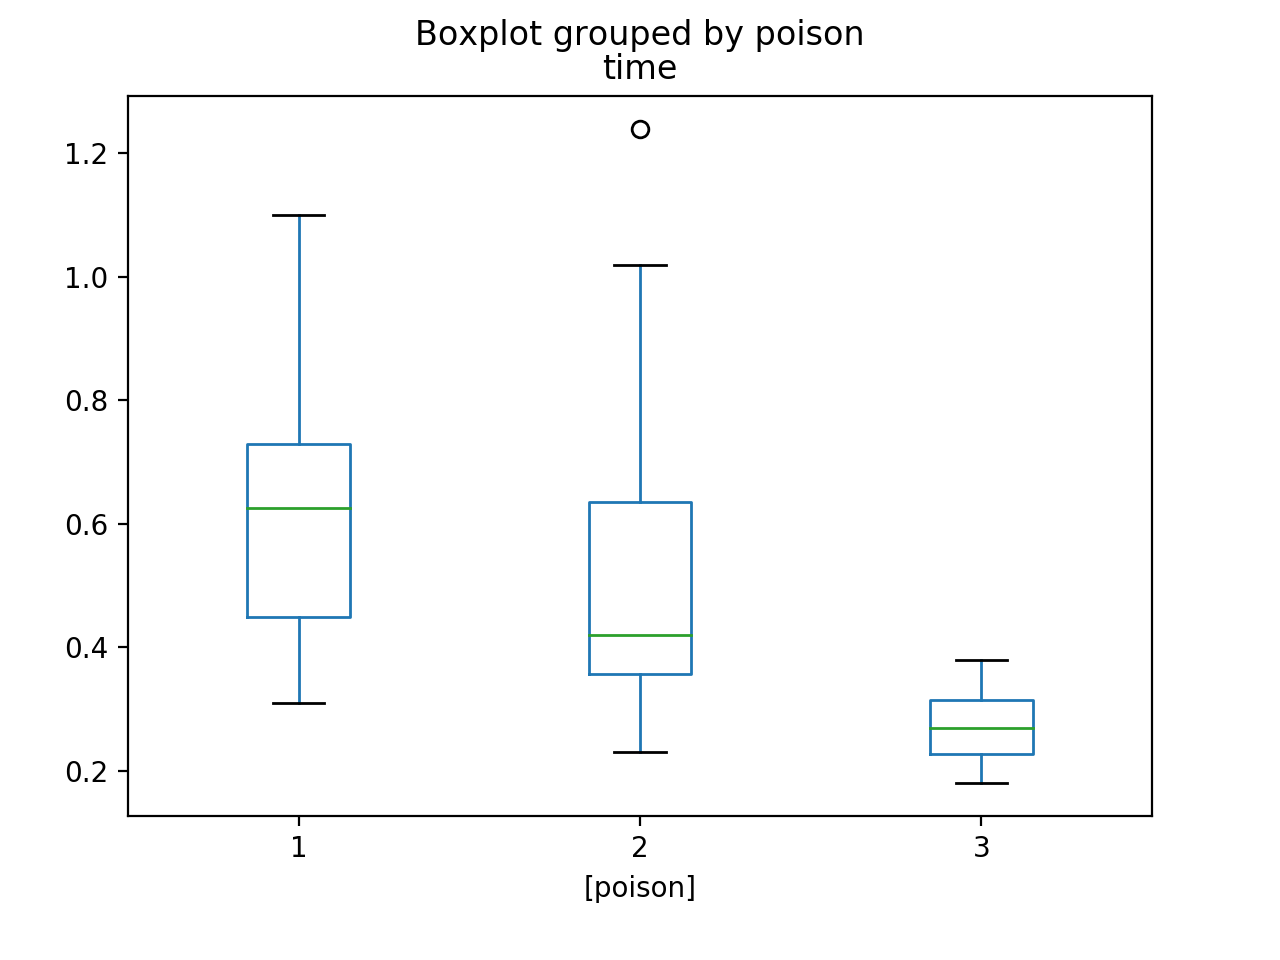

In [11]:
datasets['poisons'].boxplot(by='poison', grid=False)

2. The plot below would make me take treatment B, since it has the highest average and lower estimation of survival time.

<IPython.core.display.Javascript object>


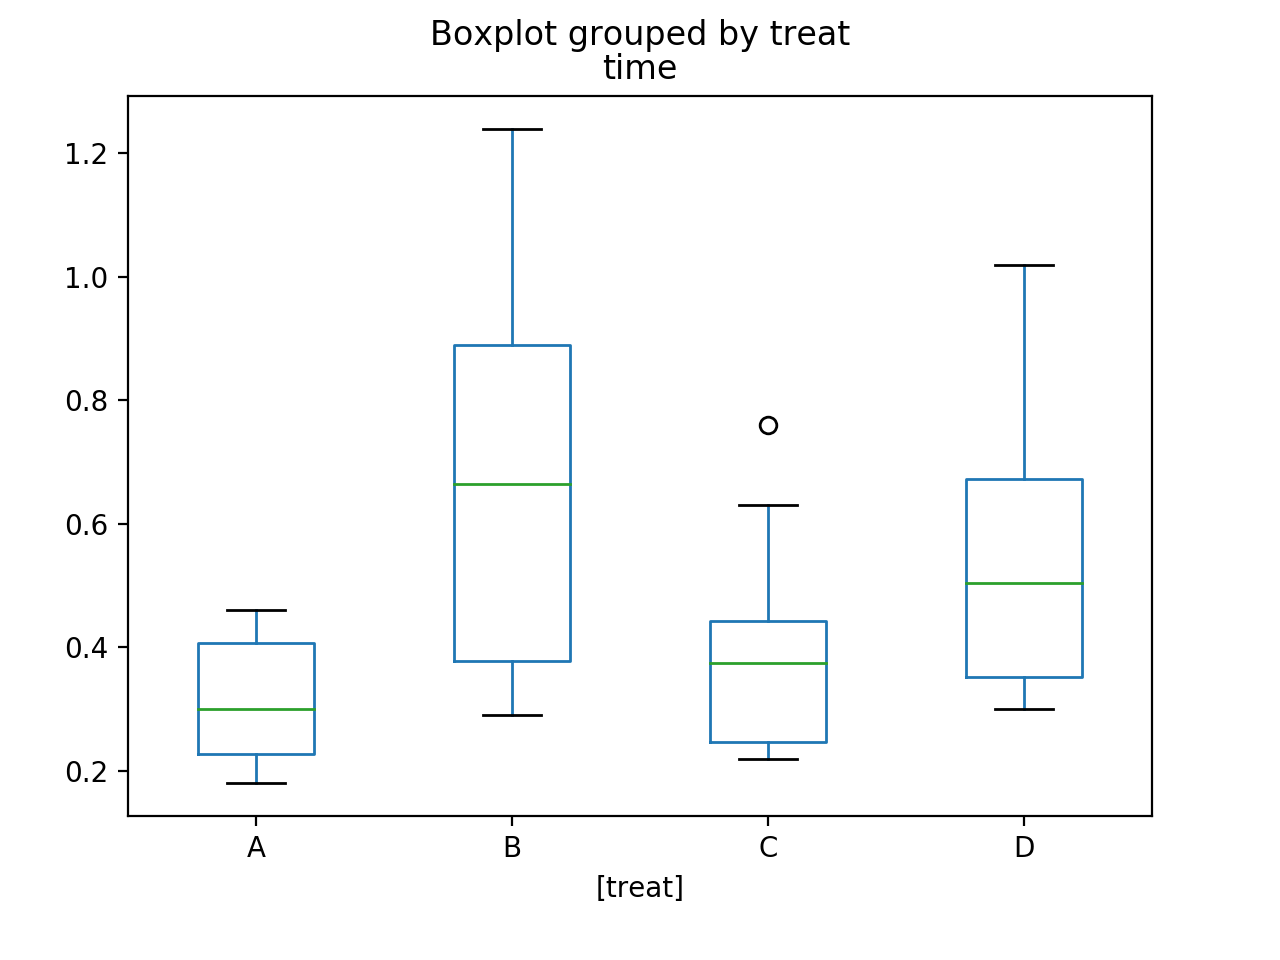

In [15]:
datasets['poisons'][['treat','time']].boxplot(by='treat', grid=False)

## Diamonds

In [22]:
diamonds = datasets['diamonds']
diamonds['price_c'] = diamonds['price']/diamonds['carat']

We can see below that the price distribution varies quite a bitbetween types of cuts as well as types of colors. Even when we normalize to the carats a diamond is.

<IPython.core.display.Javascript object>


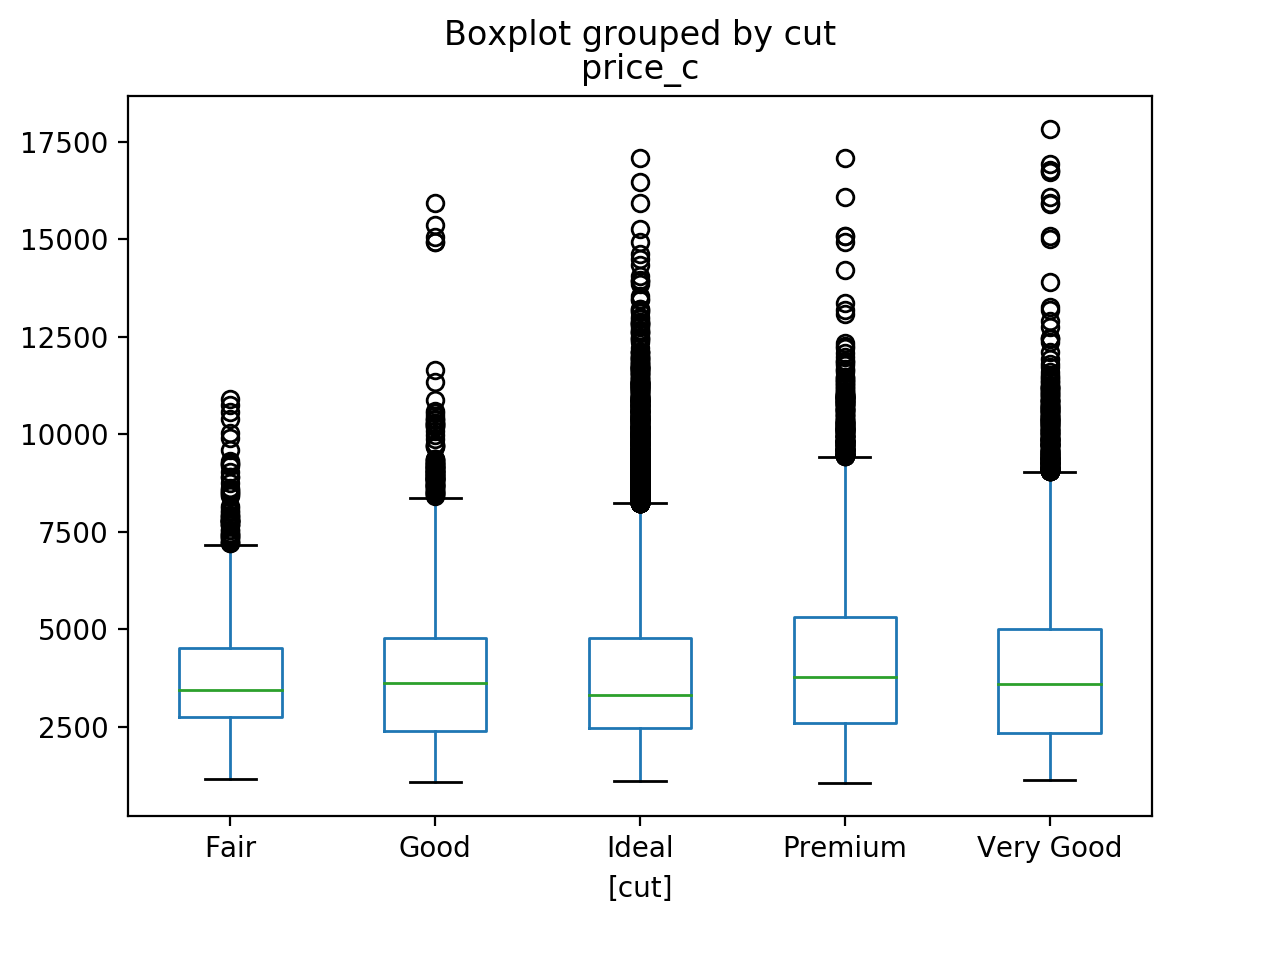

In [23]:
diamonds[['cut', 'price_c']].boxplot(by='cut', grid=False)

<IPython.core.display.Javascript object>


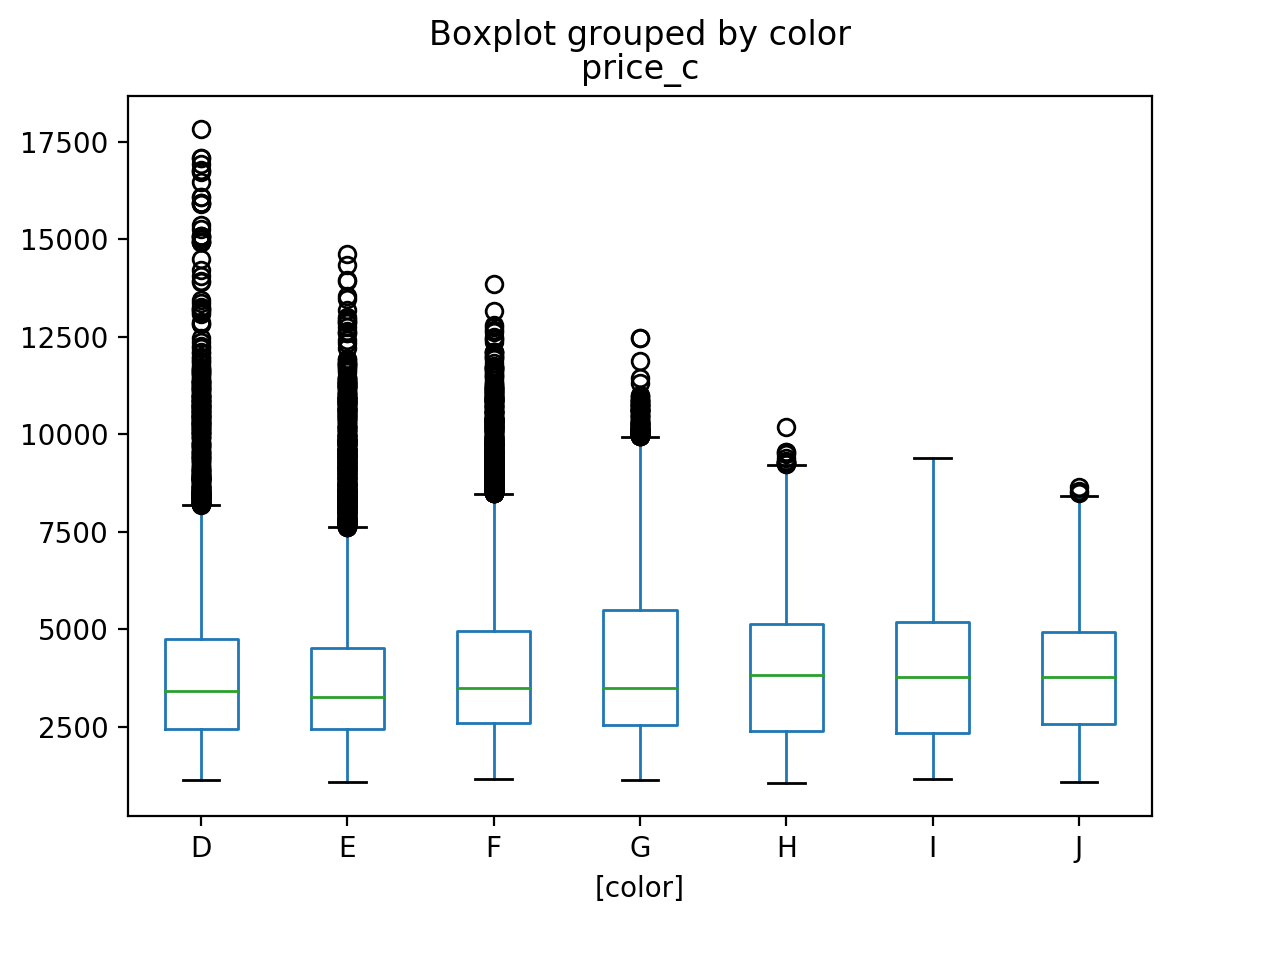

In [24]:
diamonds[['color', 'price_c']].boxplot(by='color', grid=False)

In [30]:
comp1 = diamonds[(diamonds.color=='H') & (diamonds.cut == 'Fair')]
comp2 = diamonds[(diamonds.color=='H') & (diamonds.cut == 'Ideal')]

We can see below that Ideal diamonds with color H have a higher average price:

In [31]:
print(comp1.price.mean())
print(comp2.price.mean())

5135.683168316832
3889.334831460674


This price differential dissapears once we take into account the carats of the diamond

In [32]:
print(comp1.price_c.mean())
print(comp2.price_c.mean())

3831.5085656210094
3846.0655287556824


## Problem 2

In [33]:
titanic = pd.read_csv("titanic.csv")

# 1 
Below we can see the survival rate of people based on where they embarked from

In [36]:
titanic.pivot_table(values='Survived', index=['Embarked'])

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


# 2 

Below we can see survival rates based on where they embarked and gender:

In [37]:
titanic.pivot_table(values='Survived', index=['Embarked', 'Sex'])

Survived
Embarked Sex             
C        female  0.902655
         male    0.305732
Q        female  0.616667
         male    0.111111
S        female  0.680412
         male    0.170144

It says that both women and men that embarked from C had higher survival rates.

# 3

In [49]:
titanic.pivot_table(values='Survived', index=['Embarked', 'Sex'])

Survived
Embarked Sex             
C        female  0.902655
         male    0.305732
Q        female  0.616667
         male    0.111111
S        female  0.680412
         male    0.170144

One potential reasoning for this could be the socioeconomic composition of the people that embarked from a certain location. Another possible reason could be that there are network effects on who was chosen to go on boats

# 4
We can look at the class distribution of the people that embarked from a given location. It can be seen in the following two pivot table below that many more 1st and 2nd class passengers embarked from C than from Q and S.

In [58]:
titanic.pivot_table(values='Survived', index=['Embarked', 'Sex'], columns=['Pclass'])

Pclass                1.0       2.0       3.0
Embarked Sex                                 
C        female  0.971831  1.000000  0.709677
         male    0.400000  0.294118  0.214286
Q        female  1.000000  1.000000  0.589286
         male    0.000000  0.000000  0.122807
S        female  0.956522  0.870968  0.395349
         male    0.305556  0.134228  0.144809

In [59]:
titanic.pivot_table(values='Survived', index=['Embarked', 'Sex'], columns=['Pclass'], \
                   aggfunc='count')

Pclass           1.0  2.0  3.0
Embarked Sex                  
C        female   71   11   31
         male     70   17   70
Q        female    2    2   56
         male      1    5   57
S        female   69   93  129
         male    108  149  366